In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Downloads\cardio_train.csv", sep=";")

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589,53.338177
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003,6.765427
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


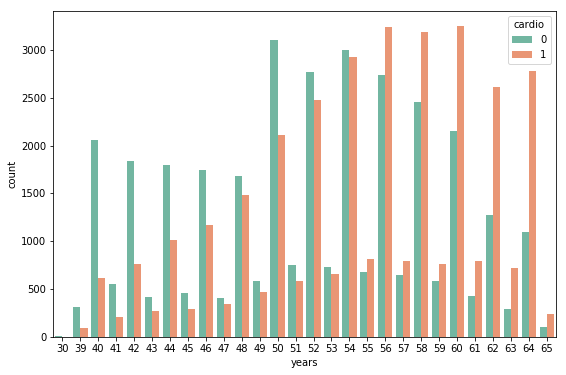

In [8]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 9, 6
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2");

### It can be observed that people over 55 of age are more exposed to CVD. 
### From the table above, we can see that there are outliers in ap_hi, ap_lo, weight and height. We will deal with them later.

#### Let's look at categorical variables in the dataset and their distribution:

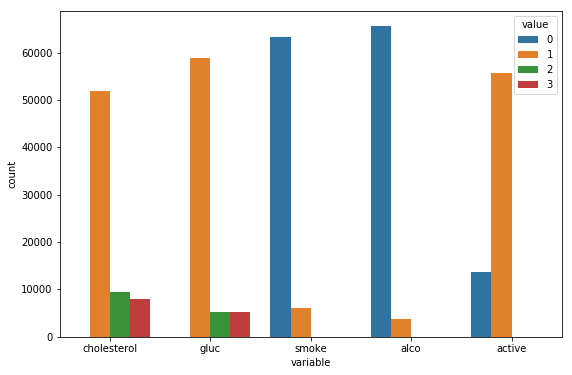

In [9]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical))

#### Bivariate analysis
#### It may be useful to split categorical variables by target class:

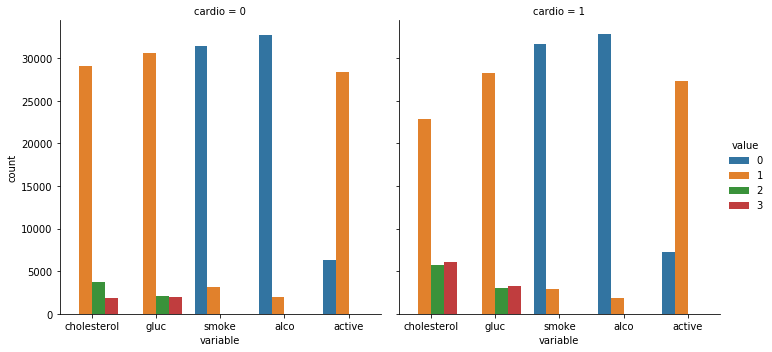

In [10]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

#### It can be clearly seen that patients with CVD have higher cholesterol and blood glucose level. And, generally speaking less active.

#### To figure out whether "1" stands for women or men in gender column, let's calculate the mean of height per gender. We assume that men are higher than women on average.

In [11]:
df.groupby('gender')['height'].mean()

gender
1    161.358659
2    169.952068
Name: height, dtype: float64

#### Average height for "2" gender is greater, than for "1" gender, therefore "1" stands for women. Let's see how many men and women presented in the dataset:


In [12]:
df['gender'].value_counts()

1    45079
2    24222
Name: gender, dtype: int64

#### Who more often report consuming alcohol - men or women?

In [13]:
df.groupby('gender')['alco'].sum()

gender
1    1153
2    2581
Name: alco, dtype: int64

#### So, men consume alcohol more frequently on average. Next, the target variables are balanced:

In [14]:
df['cardio'].value_counts(normalize=True)

0    0.500411
1    0.499589
Name: cardio, dtype: float64

In [15]:
# Cross Tab

pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender,1,2
cardio,,
0,0.327557,0.172855
1,0.322925,0.176664


#### Cleaning Data

In [16]:
df.isnull().values.sum()

0

#### Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range.


In [17]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

#### Let's get rid of the outliers, moreover blood pressure could not be negative value!

In [18]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

Diastilic pressure is higher than systolic one in 0 cases


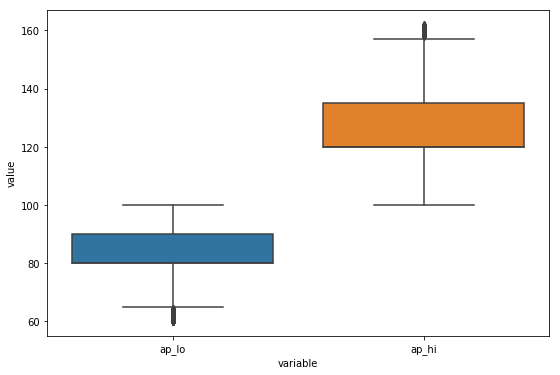

In [19]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

#### Let's create a new feature - Body Mass Index (BMI):

#### BMI = weight (kg) / [height (m)]2

#### and compare average BMI for healthy people to average BMI of ill people. Normal BMI values are said to be from 18.5 to 25.

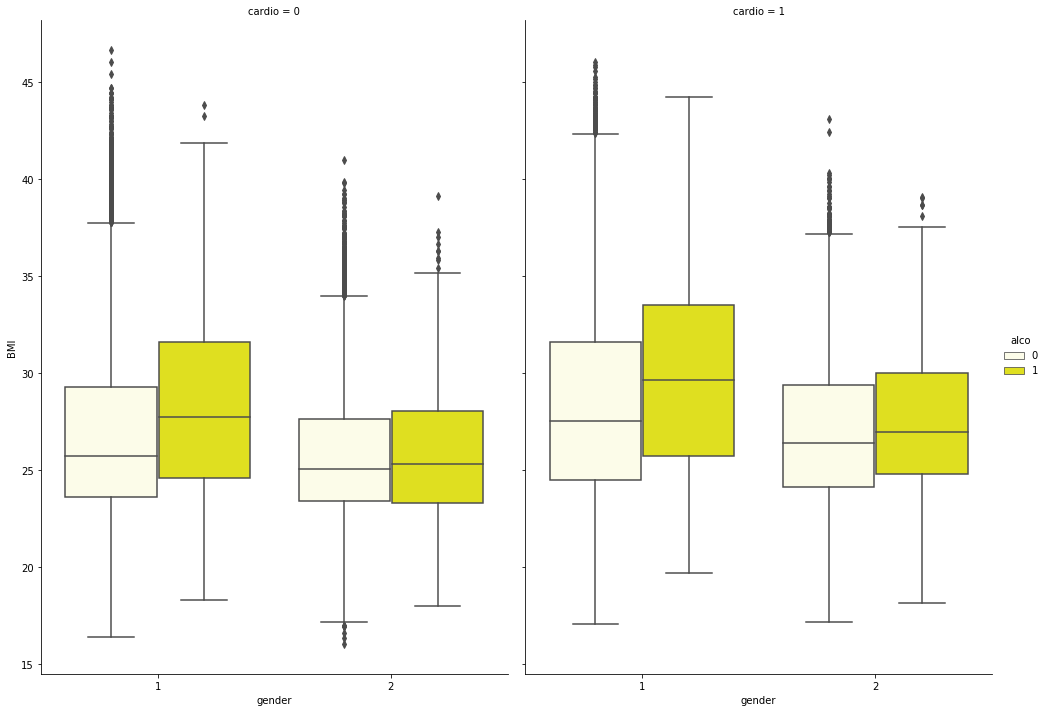

In [20]:
df['BMI'] = df['weight']/((df['height']/100)**2)
sns.catplot(x="gender", y="BMI", hue="alco", col="cardio", data=df, color = "yellow",kind="box", height=10, aspect=.7);

#### Drinking women have higher risks for CVD than drinking men based on thier BMI

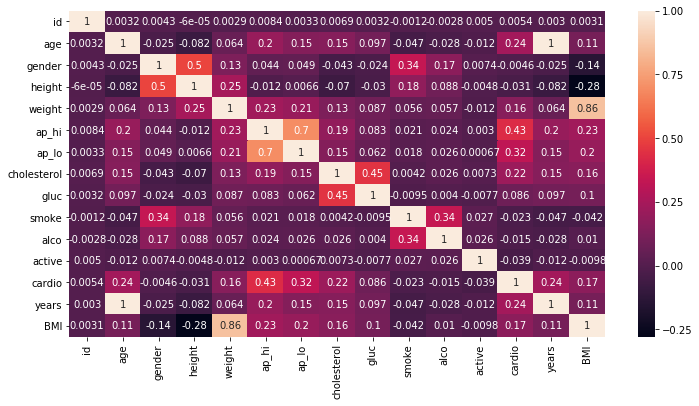

In [21]:
# Correlation Matrix:

plt.figure(figsize=(12,6)) 
sns.heatmap(df.corr(), annot=True)

#### Splitting the dataset to Train and Test

In [27]:
x = df.drop(['active' ], axis=1)

In [28]:
x.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,years,BMI
0,988,22469,1,155,69.0,130,80,2,2,0,0,0,62,28.720083
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,40,26.722873
2,990,21901,1,165,70.0,120,80,1,1,0,0,0,60,25.711662
3,991,14549,2,165,85.0,120,80,1,1,1,1,0,40,31.221304
4,992,23393,1,155,62.0,120,80,1,1,0,0,0,64,25.806452


In [24]:
y = df['active']

In [31]:
from sklearn import model_selection


In [32]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) #80/20 split

In [33]:
x_train.shape, y_train.shape

((47644, 14), (47644,))

In [34]:
x_test.shape, y_test.shape

((11911, 14), (11911,))

In [35]:
import warnings
warnings.filterwarnings('ignore')

#### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

In [38]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
prediction=model.predict(x_test)
prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.8093359079842163

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[   0 2271]
 [   0 9640]]


#### SVM

In [42]:
from sklearn.svm import SVC
clf = SVC()

In [43]:
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
pred = clf.predict(x_test)
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
accuracy_score(y_test, pred)

0.8093359079842163

#### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [47]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
predict = rfc.predict(x_test)

predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [50]:
accuracy_score(y_test, predict)

0.8065653597514902